#### Задание 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [4]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


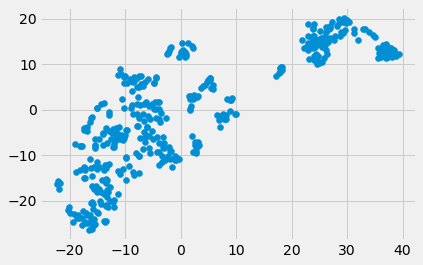

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [12]:
train_labels = model.fit_predict(X_train_scaled)

print(train_labels)

[1 0 2 1 0 0 0 2 1 1 0 0 0 1 0 0 0 2 0 2 1 0 2 0 2 0 1 2 0 2 0 0 1 1 0 2 2
 0 0 2 2 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 2 0 1 1 1 1 2 0 1 1 1 2 1 0 0 1 1 2 2 0 1 1 0 1 0 2 2 2 0 0 2 0 0 0 1
 2 0 2 2 1 1 1 0 0 0 1 1 0 2 1 1 2 2 1 2 0 0 0 0 1 0 2 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 2 0 2 1 1 1 1 1 2 0 1 0 1 2 2 0 2 0 0 2 2 1 2 2 1 1 2 0 0 0 1 0 1
 1 2 2 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0 1 0 1 2 1 0 1 1 1
 1 0 0 2 2 0 2 0 1 0 0 0 0 0 1 1 2 0 0 2 2 1 1 0 2 1 1 0 2 2 1 0 2 1 0 0 1
 0 1 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 1 1 2 1 0 1 0 0 1 2 2 0 1 2 1 1 1 0
 2 1 0 0 0 0 0 0 1 2 0 1 2 2 0 2 0 2 0 1 2 0 0 0 2 1 0 1 1 0 1 2 0 0 1 0 1
 1 0 0 1 2 0 0 2 0 0 0 1 0 0 0 0 1 0 1 0 2 2 1 2 1 0 1 2 0 1 2 0 2 0 2 0 2
 0 0 1 0 2 1 2 1 0 1 2 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 2 0 0 0 2 1 0]


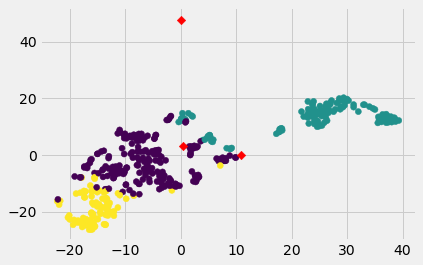

In [23]:
model.cluster_centers_
centers = scaler.inverse_transform(model.cluster_centers_)


plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [25]:
y_train.mean()

22.796534653465343

In [29]:
y_train[train_labels == 0].mean()

24.958115183246072

In [30]:
y_train[train_labels == 1].mean()

16.165354330708663

In [31]:
y_train[train_labels == 2].mean()

27.78837209302326

In [37]:
crim_data = X_train["CRIM"]
crim_data[train_labels == 0].mean()

0.42166020942408367

In [38]:
crim_data[train_labels == 1].mean()

10.797028425196853

In [39]:
crim_data[train_labels == 2].mean()

0.07356558139534886

#### Задание 3

In [43]:
test_labels = model.predict(X_test_scaled)

In [44]:
y_test.mean()

21.488235294117644

In [45]:
y_test[test_labels == 0].mean()

21.860784313725492

In [46]:
y_test[test_labels == 1].mean()

16.43714285714286

In [47]:
y_test[test_labels == 2].mean()

31.35

In [48]:
crim_test_data = X_test["CRIM"]
crim_test_data[test_labels == 0].mean()

0.26607882352941176

In [49]:
crim_test_data[test_labels == 1].mean()

10.165531142857143

In [50]:
crim_test_data[test_labels == 2].mean()

0.062060000000000004